### Iterative Studio and DVC Live

These are two separate DVC tools or projects that we use in this demo

The Iterative Studio Dashboard is a web-based user interface provided by Iterative.ai, the company behind DVC (Data Version Control) and CML (Continuous Machine Learning). It is a visual dashboard designed to enhance collaboration, reproducibility, and management of machine learning projects.

DVCLive is an open-source library for monitoring the progress of metrics during training of machine learning models. It’s built with Git and MLOps principles in mind

We'll set up both first, then use only DVCLive and then we will integrate DVCLive with Iterative Studio experiments

In [1]:
!pip install seaborn

Initialize the DVC project

In [2]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /Users/loonycorn/projects/dvc/fp_prediction/.git/


In [5]:
! dvc init

zsh:1: command not found: dvc


In [21]:
!git config --global user.name "loonytest"  
!git config --global user.email "loony.test.001@gmail.com" 

Checking git status for uncommitted info

In [22]:
!git status

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	demo-02-FlightsPricePrediction.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [23]:
!git commit -m "Initialized DVC for flights price prediction"

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	demo-02-FlightsPricePrediction.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [24]:
!git log

commit 6fb8b5390e0829a4b4ef741d59340462a0b28266 (HEAD -> main)
Author: Abhra <abhradeblaskar@gmail.com>
Date:   Tue Jul 25 20:27:13 2023 +0530

    Initialized DVC for flights price prediction


### Notes

The Iterative Studio Dashboard is a web-based user interface provided by Iterative.ai, the company behind DVC (Data Version Control) and CML (Continuous Machine Learning). It is a visual dashboard designed to enhance collaboration, reproducibility, and management of machine learning projects.

The Iterative Studio Dashboard offers various features and capabilities for machine learning project management

Project Organization: It provides a centralized hub to manage multiple machine learning projects. You can create, organize, and navigate between different projects within the dashboard.

Experiment Tracking: The dashboard allows you to track and manage experiments within your machine learning projects. 

Model Versioning: It integrates with DVC to provide version control and management for your machine learning models. 

Collaboration and Sharing: The dashboard supports collaboration by enabling team members to access and contribute to machine learning projects. 

and much more

# TODO Recording:

#### Configuring Iterative Studio

- Open a new tab and go to https://dvc.org/doc/studio/get-started - scroll and show
- Click on the Iterative Studio link and log in with your GitHub account (we should already be authorized)
- Scroll and show what is possible
- Click on the link to add a new project
- Will see a message that you need to configure settings to all this integration - follow process for this
- Go back and add the project
- You will see a message in the newly added project "This is not a DVC repository. So, we could not find data to visualize"
- Come back to this notebook and continue




In [27]:
!git remote remove origin


In [28]:
!git remote add origin https://github.com/loonytest/dvc_ap.git

In [29]:
!git branch -M main

In [30]:
!git push -u origin main

Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (6/6), 502 bytes | 502.00 KiB/s, done.
Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/loonytest/dvc_ap.git
 * [new branch]      main -> main
branch 'main' set up to track 'origin/main'.


# TODO Recording:

- Go to Studio and refresh and show that the contents have been pushed
- Click on the project and show that there is one commit visible
- Click on the Account to the top right -> Profile
- Scroll to the bottom and show that we can generate a new token
- Generate a token and come back to this page

### Notes

DVCLive is an open-source library for monitoring the progress of metrics during training of machine learning models. It’s built with Git and MLOps principles in mind:

Codification of data. Tracked metrics are stored in readable text files that can be versioned by Git or other version control tools.

Distributed. No services or servers are required. Metrics are stored in a Git repository as text files, or pointers to files in DVC storage.

GitOps API. Plots are generated through DVC using Git commit SHAs or branch names

Automation. DVCLive metrics are easy to use by any automation, DevOps, or MLOps tool such as CI/CD (including CML), custom scripts, or ML platforms.

In [31]:
!pip install dvclive


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [41]:
!dvc config --global studio.token isat_r7slxwNuIU4z2amj6BV0tDn6DfNYBxlnYBkdw4YCIWOKqw9l

In [ ]:
isat_r7slxwNuIU4z2amj6BV0tDn6DfNYBxlnYBkdw4YCIWOKqw9l

Add a remote storage for airline price prediction

In [33]:
!mkdir /tmp/dvc_storage_fpp

!dvc remote add -d localremote /tmp/dvc_storage_fpp

!dvc remote list

mkdir: /tmp/dvc_storage_fpp: File exists
Setting 'localremote' as a default remote.
localremote	/tmp/dvc_storage_fpp


In [107]:
!cat .dvc/config

[core]
    remote = localremote
['remote "localremote"']
    url = /tmp/dvc_storage_app


In [54]:
!git add .dvc/config

In [55]:
!git status

On branch main
Your branch is behind 'origin/main' by 2 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   .dvc/config
	new file:   data/.gitignore
	new file:   data/flights_price_data.csv.dvc
	new file:   linear_regression/dvc.yaml
	new file:   linear_regression/metrics.json
	new file:   linear_regression/params.yaml
	new file:   linear_regression/plots/metrics/mae.tsv
	new file:   linear_regression/plots/metrics/r2_score.tsv
	new file:   linear_regression/plots/metrics/rmse.tsv
	new file:   linear_regression/plots/metrics/training_r2_score.tsv
	new file:   linear_regression/report.html

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	data/.DS_Store
	demo-02-FlightsPricePrediction.ipynb



In [56]:
!git commit -m "Added local remote to DVC config"

[main af2c175] Added local remote to DVC config
 11 files changed, 123 insertions(+)
 create mode 100644 data/.gitignore
 create mode 100644 data/flights_price_data.csv.dvc
 create mode 100644 linear_regression/dvc.yaml
 create mode 100644 linear_regression/metrics.json
 create mode 100644 linear_regression/params.yaml
 create mode 100644 linear_regression/plots/metrics/mae.tsv
 create mode 100644 linear_regression/plots/metrics/r2_score.tsv
 create mode 100644 linear_regression/plots/metrics/rmse.tsv
 create mode 100644 linear_regression/plots/metrics/training_r2_score.tsv
 create mode 100644 linear_regression/report.html


In [57]:
!git push -u origin main

To https://github.com/loonytest/dvc_ap.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/loonytest/dvc_ap.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


Importing required packages

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

Loading the dataset and displaying top 5 rows

In [35]:
airline_price_data = pd.read_csv('data/flights_price_data.csv')

airline_price_data.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

Checking the dimensions of the dataframe

In [4]:
airline_price_data.shape

(300153, 11)

Display the Customer counts for each airline

In [5]:
airline_price_data['airline'].value_counts().rename_axis('airline').to_frame('counts').reset_index()

airline  counts
0    Vistara  127859
1  Air_India   80892
2     Indigo   43120
3   GO_FIRST   23173
4    AirAsia   16098
5   SpiceJet    9011

Visualising the customer counts by Airlines

<Axes: xlabel='airline', ylabel='count'>

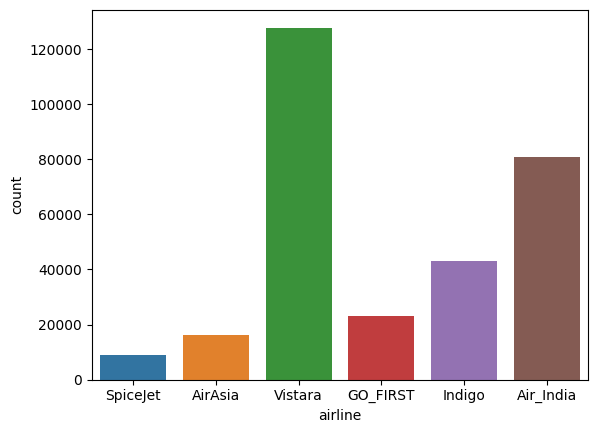

In [48]:
sns.countplot(x = 'airline', data = airline_price_data)

For logging the above , we need to convert the dataframe to dict form and then by using log_plot we can log the bar plot.It can be clearly observed that Vistara airline has highest customer counts.

In [33]:
airline_cust_counts = airline_price_data['airline'].value_counts() \
                        .rename_axis('airline').to_frame('counts') \
                        .reset_index().to_dict('records')

airline_cust_counts

[{'airline': 'Vistara', 'counts': 127859},
 {'airline': 'Air_India', 'counts': 80892},
 {'airline': 'Indigo', 'counts': 43120},
 {'airline': 'GO_FIRST', 'counts': 23173},
 {'airline': 'AirAsia', 'counts': 16098},
 {'airline': 'SpiceJet', 'counts': 9011}]

This data is NOT logged to Iterative Studio - it is only logged locally. We will connect to a Studio Experiment a little bit later

A Live() instance is required in order to log machine learning parameters, metrics and other metadata.

Live() will remove all existing DVCLive related files under dir unless resume=True.

You can use Live() as a context manager. When exiting the context manager, Live.end() will be called.

On each call, DVCLive will collect all the data logged in {Live.dir} dvclive/ by default, generate a report and save it in {Live.dir}/report.{format}. The report is in the 'html' format by default

https://dvc.org/doc/user-guide/project-structure/dvcyaml-files#plots

In [39]:
from dvclive import Live

In [35]:
from dvclive import Live

with Live() as live:
    live.log_plot(
        'customer_count_by_airline',
        airline_cust_counts,
        x = 'counts',
        y = 'airline',
        template = 'bar_horizontal',
        title = 'Customer Count by Airline')

If you have a DVC Pipeline, run it with `dvc exp run`.
If you are using DVCLive alone, use `save_dvc_exp=True`.


# TODO Recording:

- On Finder open up the repository directory dvc_airline_price_prediction
- Notice there is a dvclive/ folder there
- Expand the folder
- Drag the folder on to sublimetext so we can show the files
- Show the dvc.yaml, metric.json (empty), report.html files
- Click on report.html and show the plot in the browser
- Come back to the notebook


In [36]:
!dvc plots show

file:///Users/loonycorn/projects/dvc/dvc_airline_price_prediction/dvc_plots/index.html


In [37]:
!dvc plots show --open

file:///Users/loonycorn/projects/dvc/dvc_airline_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


Running the commands above created a new folder in our current working directory dvc_plots/

In [55]:
!ls -l

total 360
drwxr-xr-x@ 3 loonycorn  staff     96 Jul 19 07:26 data
-rw-rw-r--@ 1 loonycorn  staff  94328 Jul 20 14:41 demo-01-AirlinePricePrediction.ipynb
-rw-r--r--@ 1 loonycorn  staff  83109 Jul 20 14:15 demo-01-AirlinePricePrediction_orig.ipynb
drwxr-xr-x  3 loonycorn  staff     96 Jul 20 12:34 dvc_plots
drwxr-xr-x  7 loonycorn  staff    224 Jul 20 14:42 dvclive
drwxr-xr-x  6 loonycorn  staff    192 Jul 20 14:35 scatter_plots


In [56]:
!ls -l dvc_plots/

total 312760
-rw-r--r--@ 1 loonycorn  staff  160132544 Jul 20 14:40 index.html


Mean Aggregating the numeric columns  data based on airline

In [49]:
records_df = airline_price_data.groupby('airline').mean(numeric_only = True).reset_index()

records_df

airline   duration  days_left         price
0    AirAsia   8.941714  27.735184   4091.072742
1  Air_India  15.504235  25.497466  23507.019112
2   GO_FIRST   8.755380  27.430415   5652.007595
3     Indigo   5.795197  26.264309   5324.216303
4   SpiceJet  12.579767  24.122850   6179.278881
5    Vistara  13.326634  25.894532  30396.536302

We can log multiple plots too. Note that because we are using the same directory to track these plots, all our previous files will be overwritten

https://dvc.org/doc/user-guide/experiment-management/visualizing-plots#plot-templates-data-series-only

In [54]:
with Live() as live:
    live.log_plot(
        'customer_count_by_airline',
        airline_price_data['airline'].value_counts()
            .rename_axis('airline').to_frame('counts')
            .reset_index().to_dict('records'),
        x = 'counts',
        y = 'airline',
        template = 'bar_horizontal',
        title = "Customer Count by Airline")
    
    live.log_plot(
        'avg_ticket_price_by_airline',
        airline_price_data.groupby('airline').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'price',
        y = 'airline',
        template = 'bar_horizontal',
        title =  'Average Ticket Price by Airline')
    
    live.log_plot(
        'avg_ticket_price_by_class',
        airline_price_data.groupby('class').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'price',
        y = 'class',
        template = 'bar_horizontal',
        title =  'Average Ticket Price by Class')
    
    live.log_plot(
        'avg_ticket_price_by_stops',
        airline_price_data.groupby('stops').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'price',
        y = 'stops',
        template = 'bar_horizontal',
        title =  'Average Ticket Price by Number of Stops')
    
    live.log_plot(
        'duration_vs_price',
        airline_price_data.to_dict('records'),
        x = 'duration',
        y = 'price',
        template = 'scatter',
        title =  'Duration vs. Price')
    
    live.log_plot(
        'days_left_vs_price',
        airline_price_data.to_dict('records'),
        x = 'days_left',
        y = 'price',
        template = 'scatter',
        title = 'Days Left vs. Price')

If you have a DVC Pipeline, run it with `dvc exp run`.
If you are using DVCLive alone, use `save_dvc_exp=True`.


# TODO Recording:

- Go to the Sublimetext where we have the dvclive folder files
- Click on dvc.yaml and show all the new plots that we have
- Click on a few JSON files to show the data
- Click on reports.html to open up and show the plots
- Will need to wait for sometime before all the plots show

It can be clearly observed that Vistara airline is having highest avg. ticket price.

As expected, Business class is having highest avg. ticket price. 
And one stop flight is having highest avg. ticket price. 

Scatter plots between price and duration and days left and price does not have any pattern.

But aggregated price based on duration and days left has clear pattern wrt price.

For days left vs price, the graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explained by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

For duration vs price, it is clear that here the relationship is not linear but can be approximated with a second degree curve. The prices reaches a high price at a duration of 20 hours before lowering again.

Plot these in a new folder

In [53]:
with Live(dir = 'scatter_plots') as live:

    live.log_plot(
        'duration_vs_price',
        airline_price_data.groupby('duration').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'duration',
        y = 'price',
        template = 'scatter',
        title = 'Duration vs. Price')
    
    live.log_plot(
        'days_left_vs_price',
        airline_price_data.groupby('days_left').mean(numeric_only = True)
            .reset_index().to_dict('records'),
        x = 'days_left',
        y = 'price',
        template = 'scatter',
        title = 'Days Left vs. Price')

If you have a DVC Pipeline, run it with `dvc exp run`.
If you are using DVCLive alone, use `save_dvc_exp=True`.


# TODO Recording

- go to ~/projects/dvc/dvc_airline_price_prediction/scatter_plots
- Run `ls -l` and show
- Run `cat dvc.yaml` and show
- Run these commands from the terminal

`dvc plots show`

`dvc plots show --open`

- Show the plots

Save data as a CSV file

In [59]:
airline_price_data.groupby('duration').mean(numeric_only = True) \
    .reset_index().to_csv('duration_vs_price.csv',index = False)

In [60]:
!ls -l

total 400
drwxr-xr-x@ 3 loonycorn  staff     96 Jul 19 07:26 data
-rw-rw-r--@ 1 loonycorn  staff  96205 Jul 20 15:13 demo-01-AirlinePricePrediction.ipynb
-rw-r--r--@ 1 loonycorn  staff  83109 Jul 20 14:15 demo-01-AirlinePricePrediction_orig.ipynb
-rw-r--r--  1 loonycorn  staff  18392 Jul 20 15:14 duration_vs_price.csv
drwxr-xr-x  3 loonycorn  staff     96 Jul 20 12:34 dvc_plots
drwxr-xr-x  7 loonycorn  staff    224 Jul 20 14:42 dvclive
drwxr-xr-x  7 loonycorn  staff    224 Jul 20 14:59 scatter_plots


In [61]:
!dvc plots show duration_vs_price.csv --template scatter -x duration -y price --open

file:///Users/loonycorn/projects/dvc/dvc_airline_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


In [75]:
!mkdir images

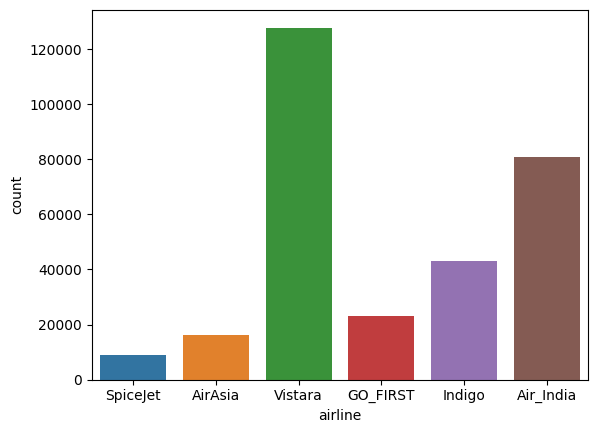

In [76]:
sns.countplot(x = 'airline', data = airline_price_data)

plt.savefig('images/customer_count_by_airline.png')

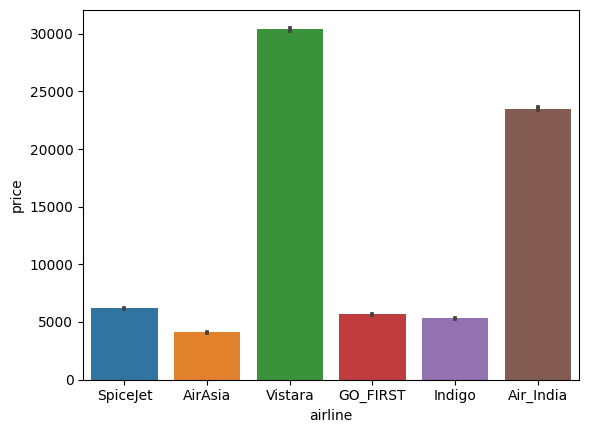

In [77]:
sns.barplot(x = 'airline', y = 'price', data = airline_price_data)

plt.savefig('images/avg_ticket_price_by_airline.png')

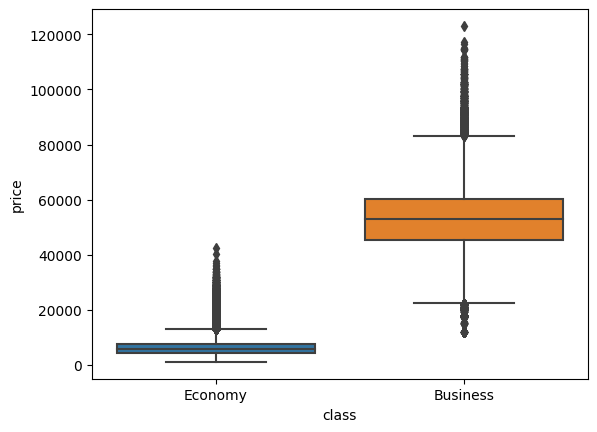

In [78]:
sns.boxplot(x = 'class', y = 'price', data = airline_price_data)

plt.savefig('images/ticket_price_by_class.png')

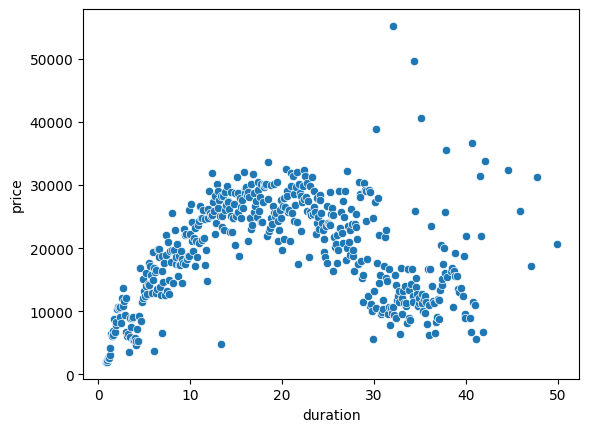

In [79]:
sns.scatterplot(x = 'duration', y = 'price', 
                data = airline_price_data.groupby('duration').mean(numeric_only = True))

plt.savefig('images/duration_vs_price.png')

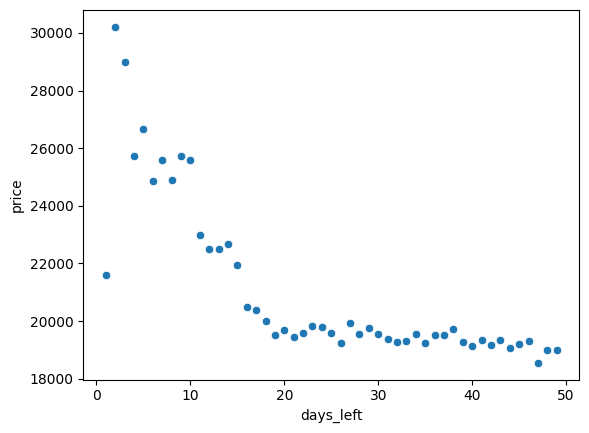

In [80]:
sns.scatterplot(x = 'days_left', y = 'price', 
                data = airline_price_data.groupby('days_left').mean(numeric_only = True))

plt.savefig('images/days_left_vs_price.png')

# TODO Recording:

- Open up the Home page of Jupyter notebook server
- Click on the images/ folder
- Show that we have 5 images there
- Come back to the notebook


In [81]:
with Live() as live:
    
    live.log_image("customer_count_by_airline.png", "images/customer_count_by_airline.png")
    live.log_image("avg_ticket_price_by_airline.png", "images/avg_ticket_price_by_airline.png")
    live.log_image("ticket_price_by_class.png", "images/ticket_price_by_class.png")
    live.log_image("duration_vs_price.png", "images/duration_vs_price.png")
    live.log_image("days_left_vs_price.png", "images/days_left_vs_price.png")

If you have a DVC Pipeline, run it with `dvc exp run`.
If you are using DVCLive alone, use `save_dvc_exp=True`.


# TODO Recording:

- Open Finder window to ~/projects/dvc/dvc_airline_price_prediction
- Show that dvclive/ folder
- In the dvclive/images/ you should find the 5 images
- Open up any image and show
- Come back to the notebook

There should be nothing in cache here

In [ ]:
ls -R .dvc/

Enabling caching of images - now these images are tracked using DVC (it's like doing a `dvc add` on these images, they will now be in cache)

In [82]:
with Live(cache_images = True) as live:

    live.log_image("customer_count_by_airline.png", "images/customer_count_by_airline.png")
    live.log_image("avg_ticket_price_by_airline.png", "images/avg_ticket_price_by_airline.png")
    live.log_image("ticket_price_by_class.png", "images/ticket_price_by_class.png")
    live.log_image("duration_vs_price.png", "images/duration_vs_price.png")
    live.log_image("days_left_vs_price.png", "images/days_left_vs_price.png")

If you have a DVC Pipeline, run it with `dvc exp run`.
If you are using DVCLive alone, use `save_dvc_exp=True`.


Caching can be checked

In [83]:
ls -R .dvc/cache

md5/

.dvc/cache/files/md5:
00/ 11/ 1d/ 96/ c9/ f7/

.dvc/cache/files/md5/00:
9714d0efd81d6b112f19257062256d.dir

.dvc/cache/files/md5/11:
a92241b13a1424ee91a6ce05bf6c0e

.dvc/cache/files/md5/1d:
3d26150c4deab3bba074793793d3ce

.dvc/cache/files/md5/96:
ab8a44404c62600d42f610e634c07a

.dvc/cache/files/md5/c9:
733601e8054dd9be77b9888effd7fd

.dvc/cache/files/md5/f7:
931629b44376dc657b45a50edf43d8


In [ ]:
cat .dvc/cache/files/md5/80/79edce34fcbd1e7f8a86aef56d7deb.dir

In [85]:
cat .dvc/cache/files/md5/00/9714d0efd81d6b112f19257062256d.dir

[{"md5": "f7931629b44376dc657b45a50edf43d8", "relpath": "avg_ticket_price_by_airline.png"}, {"md5": "96ab8a44404c62600d42f610e634c07a", "relpath": "customer_count_by_airline.png"}, {"md5": "11a92241b13a1424ee91a6ce05bf6c0e", "relpath": "days_left_vs_price.png"}, {"md5": "1d3d26150c4deab3bba074793793d3ce", "relpath": "duration_vs_price.png"}, {"md5": "c9733601e8054dd9be77b9888effd7fd", "relpath": "ticket_price_by_class.png"}]

The data has not been pushed to remote yet - we'll need to do a dvc push for that

In [ ]:
ls -R /tmp/dvc_storage_fpp

In [87]:
!dvc push

6 files pushed                                                                  


In [89]:
ls -R /tmp/dvc_storage_fpp

files/

/tmp/dvc_storage_app/files:
md5/

/tmp/dvc_storage_app/files/md5:
00/ 11/ 1d/ 96/ c9/ f7/

/tmp/dvc_storage_app/files/md5/00:
9714d0efd81d6b112f19257062256d.dir

/tmp/dvc_storage_app/files/md5/11:
a92241b13a1424ee91a6ce05bf6c0e

/tmp/dvc_storage_app/files/md5/1d:
3d26150c4deab3bba074793793d3ce

/tmp/dvc_storage_app/files/md5/96:
ab8a44404c62600d42f610e634c07a

/tmp/dvc_storage_app/files/md5/c9:
733601e8054dd9be77b9888effd7fd

/tmp/dvc_storage_app/files/md5/f7:
931629b44376dc657b45a50edf43d8


Now we are going to train a regression model and log all the model parameters and metrics to an experiment

# TODO Recording IMPORTANT

- Before we do anything here, go to the Finder window and remove all the directories we do not need e.g. dvclive, scatter_plots
- Should only be left with data/ and this notebook

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = airline_price_data.drop(columns = ['price', 'flight'])
y = airline_price_data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.3, random_state = 144)

categorical_features = [
    'airline', 
    'source_city', 
    'departure_time', 
    'arrival_time', 
    'destination_city', 
    'stops', 'class'
]

categorical_transformer = Pipeline(
    steps = [(
        'encoder_cat', OneHotEncoder(
            handle_unknown = 'ignore', 
            drop = 'first', sparse_output = False)
        )
    ]
)

preprocessor = ColumnTransformer(
    transformers = [(
        'cat_tr', categorical_transformer, categorical_features
    )], 
    remainder = StandardScaler()
)

### Linear regression

In [43]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Access regression parameters
params_reg = lr_model.get_params()
print(params_reg)

pipe_lr = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', lr_model)])

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)
    
training_score = pipe_lr.score(X_train, y_train)
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_sq_error = mean_squared_error(y_test, y_pred, squared = False)
r_sq_score = r2_score(y_test, y_pred)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### Notes:

Basic structure of the dvc.yaml file:
https://dvc.org/doc/user-guide/project-structure/dvcyaml-files


##### log_artifact()

https://dvc.org/doc/dvclive/live/log_artifact

Tracks an existing directory or file with DVC. Uses dvc add to track path with DVC, generating a {path}.dvc file. When combined with save_dvc_exp=True, it will ensure that {path}.dvc is included in the experiment.

If Live was initialized with dvcyaml=True (which is the default) and you include any of the optional metadata fields (type, name, desc, labels, meta), it will add an artifact and all the metadata passed as arguments to the corresponding dvc.yaml. The "type" field here is "dataset", another common option is "model". 

##### log_param()

https://dvc.org/doc/dvclive/live/log_param

On each live.log_param(name, val) call, DVCLive will write the name parameter to {Live.dir}/params.yaml with the corresponding val

##### log_metric()

https://dvc.org/doc/dvclive/live/log_metric

On each live.log_metric(name, val) call DVCLive will create a metrics history file in {Live.plots_dir}/metrics/{name}.tsv:

Note: The warning is fine because we don't really want to track these files. 

##### save_dvc_exp = True,

This connects Live to DVC Studio and saves the metrics and params tracked within an experiment

In [44]:
with Live(
    dir = 'linear_regression', 
    save_dvc_exp = True, 
    exp_message = 'Flights price prediction with linear regression'
) as live:
    
    live.log_artifact(
        'data/flights_price_data.csv',
        type = 'dataset',
        name = 'flightprices',
        desc = 'Flights price prediction dataset',
        labels = ['regression', 'prices'],
    )
    
    for param_name, param_value in params_reg.items():
        live.log_param(param_name, param_value)

    live.log_metric('training_r2_score', training_score)   
    live.log_metric('mae', mean_abs_error)
    live.log_metric('rmse', root_mean_sq_error)
    live.log_metric('r2_score', r_sq_score)

	.DS_Store, demo-02-FlightsPricePrediction.ipynb, .ipynb_checkpoints/demo-02-FlightsPricePrediction-checkpoint.ipynb


# TODO Recording:

- Go to the Finder window ~/projects/dvc/dvc_airline_price_prediction/
- Show that there is a folder called linear_regression/
- IMPORTANT: Drag the linear_regression/ folder to Sublimetext and click on each file and show
- Go to Studio and show the project
- A new experiment will have been created, but nothing is available yet in the experiment
- Studio will have the details only when we commit our git changes and push the experiment to the remote repo

In [45]:
!dvc exp list

main:                                                                 
	7c8707b [jammy-tire]
	9821878 [sural-wool]


In [46]:
!dvc exp show

 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  Experiment                 Created    training_r2_score    mae     rmse   r2_score   copy_X   fit_intercept   n_jobs   positive  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  workspace                  -                    0.91127   4556   6737.1    0.91188   True     True            -        False     
  main                       08:27 PM                   -      -        -          -   -        -               -        -         
  ├── 7c8707b [jammy-tire]   08:44 PM             0.91127   4556   6737.1    0.91188   True     True            -        False     
  └── 9821878 [sural-wool]   08:43 PM             0.91127   4556   6737.1    0.91188   True     True            -        False     
 ───────────────────────────────────────────────────────────────────────────

You should only find a whole bunch of untracked files here

In [47]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	data/
	demo-02-FlightsPricePrediction.ipynb
	linear_regression/

no changes added to commit (use "git add" and/or "git commit -a")


### Notes:

- This will not push the notebook code to git because it is not in general considered part of the experiment
- If we want the notebook we should explicitly add it and commit it
- In this demo we are not committing the notebook code

# TODO Recording:

- First go to this repository on GitHub https://github.com/loonytest/dvc_flights_price_prediction
- Show that it still has only the initial commit we made earlier - none of the experiment stuff has been committed
- Specify your git username loonytest and the token that you generated from GitHub

In [1]:
!dvc exp push origin medal-body

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `dvc exp push origin <experiment_id>'


# TODO Recording:

- Go to this repository on GitHub https://github.com/loonytest/dvc_flights_price_prediction
- Again there is nothing here - we haven't pushed to Git yet
- Now go to Studio and show that the experiment details are available there
- Note that all the metrics are available
- Hover over the experiment dataset and show that we can copy the path of our data
- Select the experiment and click on the plot icon on top
- Click on the plot icon next to the experiment name and wait for the plots to load (the plots are not that interesting as we don't any any epochs in training)

##### Create a git branch
- Click on dvc_airline_price_prediction on top and go to the main Project page for this repo
- Click on the 3 dots next to the experiment and select the option "Create branch/pull request"
- Use the default branch name 
- Select the checkbox "Create a pull request after creating a branch?"
- Choose base branch as main
- Create branch
- Go to this repository on GitHub
- Notice that we now have two branches! We have pushed the changes related to this experiment to a different branch

##### Explore branch and merge with main
- Select the experiment_id-branch
- Click on the files in the branch and show a few important files (use the left navigation pane)
- dvc.yaml, metrics.json, params.yaml, airline_price_data.csv.dvc
- Expand all folders and show
- Show that on top the "Pull Requests" tab shows a notification
- Click on that tab and see that the request is about merging the <experiment_id>-branch with main
- Click on merge and perform the merge 
- Now go to the main branch and all the experiment files should be here

##### DVC Studio
- Now go to DVC Studio and update the project
- Show that the activity in GitHub is reflected here

### Notes

##### Git branch
In Git, a branch is a lightweight movable pointer that represents an independent line of development. It is used to work on different features, bug fixes, or experiments without affecting the main project or other branches.

Independent Line of Development: Each branch in Git represents a separate line of development. It allows you to make changes, commit new versions, and work on different aspects of a project without affecting the code in other branches.

Reference to a Commit: A branch in Git is essentially a reference to a specific commit. It points to the latest commit in the branch's commit history. By creating a branch, you create a new pointer that can move independently as new commits are added.

Branches and the Main Branch (usually 'main'): Git typically starts with a main branch, often named 'master' or 'main'. It serves as the default branch and represents the stable, production-ready version of the code. You can create new branches from the main branch to work on new features or bug fixes.

##### Pull request

In Git, a pull request is a feature that enables collaboration and code review when working with distributed version control systems like Git. A pull request allows developers to propose changes made in a branch of a repository to be merged into another branch, often the main branch, of the same repository.

Branch Creation: A developer creates a new branch, typically from the main branch, to work on a specific feature or bug fix. This branch contains the proposed changes.

Local Commits: The developer makes and commits changes to the local branch, iteratively working on the feature or bug fix. This includes adding, modifying, or deleting code, files, or other project resources.

Push to Remote: Once the local branch is ready for review and inclusion in the main branch, the developer pushes the branch to the remote repository, making the branch and its commits available to others.

Pull Request Creation: Using the version control platform (e.g., GitHub, GitLab, Bitbucket), the developer creates a pull request (also known as a merge request or merge pull request) that describes the proposed changes, provides context, and requests review.

Merge: Once the pull request is reviewed, approved, and deemed ready, it can be merged into the target branch, such as the main branch. Merging applies the changes from the pull request branch to the target branch, incorporating the proposed feature or bug fix.

# TODO Recording

- Before we start recording let's clear our Finder 
- Go to Finder ~/projects/dvc/dvc_airline_price_prediction
- Remove the linear_regression directory (we'll pull this from the main branch later). This is to avoid merge conflicts

Sync with the main branch 

In [49]:
!git add data/

In [51]:
!git add linear_regression/

In [58]:
!git status


On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 2 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/
	data/.DS_Store
	demo-02-FlightsPricePrediction.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [52]:
! git pull

Updating 6fb8b53..8557d6c
error: Your local changes to the following files would be overwritten by merge:
	.dvc/config
Please commit your changes or stash them before you merge.
Aborting


In [ ]:
!ls -l

### KNN Regression

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

params_reg = knn_model.get_params()
print(params_reg)

pipe_knn = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', knn_model)])

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)
    
training_score = pipe_knn.score(X_train, y_train)
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_sq_error = mean_squared_error(y_test, y_pred, squared = False)
r_sq_score = r2_score(y_test, y_pred)

with Live(
    dir = 'knn_regression', 
    save_dvc_exp = True, 
    exp_message = 'Flights price prediction with KNN regression'
) as live:

    for param_name, param_value in params_reg.items():
        live.log_param(param_name, param_value)
        
    live.log_metric('training_r2_score', training_score)   
    live.log_metric('mae', mean_abs_error)
    live.log_metric('rmse', root_mean_sq_error)
    live.log_metric('r2_score', r_sq_score)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


	demo-01-AirlinePricePrediction_orig.ipynb, demo-01-AirlinePricePrediction.ipynb, .DS_Store, linear_regression/dvc.yaml, .ipynb_checkpoints/demo-01-AirlinePricePrediction_orig-checkpoint.ipynb, .ipynb_checkpoints/demo-01-AirlinePricePrediction-checkpoint.ipynb, dvclive/.DS_Store, dvclive/dvc.yaml, dvclive/plots/.DS_Store, data/airline_price_data.csv.dvc, data/.gitignore


This pushes all commits to Studio - this will push the older linear regression as well if that changes

In [9]:
!dvc exp push origin -A

Pushing git refs|                                   |0.00/? [00:00,      ?obj/s]Username for 'https://github.com': ^C
ERROR                                                                           : Authentication failed for: 'origin'
See https://dvc.org/doc/user-guide/troubleshooting#git-auth


# TODO Recording:

- Go to the Studio page and show that this new experiment has been recorded
- Scroll horizontally and show that we have all the information
- Click on "Columns" and show the options
- Uncheck all the params so we only see the metrics
- Select both the "linear regression" experiment and the "knn regression" experiment
- Click on the "Compare" button and show the comparisons
- Show the comparisons for hidden fields as well
- This has not been committed to Git but we will not do that now

### Notes:

#### log_artifact() for type = model

Uses dvc add to track path with DVC, generating a {path}.dvc file. When combined with save_dvc_exp=True, it will ensure that {path}.dvc is included in the experiment.

If Live was initialized with dvcyaml=True (which is the default) and you include any of the optional metadata fields (type, name, desc, labels, meta), it will add an artifact and all the metadata passed as arguments to the corresponding dvc.yaml. Passing type="model" will mark it as a model for DVC and will make it appear in Studio Model Registry. If we do not log the artifact it will not be present as an entry in the dvc.yaml file and will not be pushed to DVC when we push the experiment


In [32]:
import os
from joblib import dump

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
params_reg = rf_model.get_params()
print(params_reg)

pipe_rf = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', rf_model)])

pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)
    
training_score = pipe_rf.score(X_train, y_train)
mean_abs_error = mean_absolute_error(y_test, y_pred)
root_mean_sq_error = mean_squared_error(y_test, y_pred, squared = False)
r_sq_score = r2_score(y_test, y_pred)

# Create a path where we store the serialized model
os.makedirs('model_dir', exist_ok = True)
model_path = os.path.join('model_dir', 'flight-price-prediction.joblib')

# Store the model in this directory
dump(pipe_rf, model_path)


with Live(
    dir = 'rf_regression', 
    save_dvc_exp = True, 
    exp_message = 'Flights price prediction with Random Forest regression'
) as live:
    
    live.log_artifact(
        'data/flights_price_data.csv',
        type = 'dataset',
        name = 'flightprices',
        desc = 'Flights price prediction dataset',
        labels = ['regression', 'prices'],
    )
    
    for param_name, param_value in params_reg.items():
        live.log_param(param_name, param_value)
    
    live.log_plot(
        'predicted_vs_actual_price',
        pd.DataFrame({'predicted': y_pred, 'actual': y_test}).to_dict('records'),
        x = 'actual',
        y = 'predicted',
        template = 'scatter',
        title =  'Predicted price vs. Actual price')
    
    live.log_metric('training_r2_score', training_score)   
    live.log_metric('mae', mean_abs_error)
    live.log_metric('rmse', root_mean_sq_error)
    live.log_metric('r2_score', r_sq_score)
    
    live.log_artifact(model_path, type = 'model')

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


	demo-01-AirlinePricePrediction_orig.ipynb, demo-01-AirlinePricePrediction.ipynb, .DS_Store, predicted_vs_actual_price.csv, dvc_plots/index.html, knn_regression/dvc.yaml, linear_regression/dvc.yaml, .ipynb_checkpoints/demo-01-AirlinePricePrediction_orig-checkpoint.ipynb, .ipynb_checkpoints/demo-01-AirlinePricePrediction-checkpoint.ipynb


We can check the Logged plot here

In [15]:
pd.DataFrame({'predicted': y_pred, 'actual': y_test})\
    .to_csv('predicted_vs_actual_price.csv', index = False)

In [18]:
!dvc plots show predicted_vs_actual_price.csv --template scatter -x actual -y predicted --open

file:///Users/loonycorn/projects/dvc/dvc_airline_price_prediction/dvc_plots/index.html
To enable auto opening, you can run:

	dvc config plots.auto_open true


# TODO Recording

- Go to the Finder window ~/projects/dvc/dvc_flights_price_prediction
- Drag the rf_regression folder to Sublimetext
- Show the dvc.yaml file for this - note that the model has been added in the artifacts. 
- Drag the model_dir page and show the .gitignore and the airline-price-prediction.joblib.dvc file for the model
- Because it is of type model when we push the experiment we can see the model in the Studio's Model Registry
- Go to the Studio UI, refresh and show the experiment - copy over the experiment ID

In [ ]:
!dvc exp push origin weird-cors

# TODO Recording:

- After pushing the experiment go to Studio - scroll and show we now have model metrics 
- Note that we also have a column for the RF model artifacts
- Select the RF model and click on the Plot icon
- Click on the Plot icon to show the plots - note that our custom plot is also available here, hover over plot and show
- Click on "loonytest" username on the top left and go to the main page
- Go to the "Models" tab
- Show that the model now shows up in the model registry
- Click on the 3 dots next to the model and go to "Show model page"
- There are no details on this page
- Click on Register Version from the top-right and it asks for a commit hash
- Go back to the Projects view (Click on Models, then Projects, then the airline prediction Project)
- Find the column for the model (will be in green and available only for RF regression)
- Click on the drop down again and select "Version Registration"
- This will take you to the models page with a DVC commit hash for the model
- Try to register v1.0 this will FAIL (because we have committed changes to github yet)
- Click on the Failed icon to see the issues - you will find the error there
- Dismiss the warning

Get changes from the main branch

In [54]:
!git pull

error: Your local changes to the following files would be overwritten by merge:
	.dvc/config
Please commit your changes or stash them before you merge.
error: The following untracked working tree files would be overwritten by merge:
	linear_regression/dvc.yaml
	linear_regression/metrics.json
	linear_regression/params.yaml
	linear_regression/plots/metrics/mae.tsv
	linear_regression/plots/metrics/r2_score.tsv
	linear_regression/plots/metrics/rmse.tsv
	linear_regression/plots/metrics/training_r2_score.tsv
Please move or remove them before you merge.
Aborting
Merge with strategy ort failed.


In [34]:
!ls -la model_dir/

total 1632384
drwxr-xr-x   5 loonycorn  staff        160 Jul 21 10:35 .
drwxr-xr-x  16 loonycorn  staff        512 Jul 21 10:36 ..
-rw-r--r--   1 loonycorn  staff         33 Jul 21 10:35 .gitignore
-rw-r--r--   1 loonycorn  staff  835768480 Jul 21 10:35 airline-price-prediction.joblib
-rw-r--r--   1 loonycorn  staff        116 Jul 21 10:35 airline-price-prediction.joblib.dvc


In [46]:
!git add model_dir/.

In [39]:
!ls -la rf_regression/

total 24
drwxr-xr-x   6 loonycorn  staff  192 Jul 21 10:35 .
drwxr-xr-x  16 loonycorn  staff  512 Jul 21 10:40 ..
-rw-r--r--   1 loonycorn  staff  497 Jul 21 10:35 dvc.yaml
-rw-r--r--   1 loonycorn  staff  147 Jul 21 10:35 metrics.json
-rw-r--r--   1 loonycorn  staff  298 Jul 21 10:35 params.yaml
drwxr-xr-x   4 loonycorn  staff  128 Jul 21 10:35 plots


In [44]:
!git add rf_regression/.

In [47]:
!git add data/.

Make sure there are no .DS_Store files in here (delete them behind the scenes from the terminal if they are present)

In [48]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   data/.gitignore
	new file:   data/airline_price_data.csv.dvc
	new file:   model_dir/.gitignore
	new file:   model_dir/airline-price-prediction.joblib.dvc
	new file:   rf_regression/dvc.yaml
	new file:   rf_regression/metrics.json
	new file:   rf_regression/params.yaml
	new file:   rf_regression/plots/custom/predicted_vs_actual_price.json
	new file:   rf_regression/plots/metrics/mae.tsv
	new file:   rf_regression/plots/metrics/r2_score.tsv
	new file:   rf_regression/plots/metrics/rmse.tsv
	new file:   rf_regression/plots/metrics/training_r2_score.tsv

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_

Get the latest revisions from the main branch (the linear regression model that we had merged into main)

In [49]:
!git commit -m "Committing model, data, and experiment files for RF model"

[main d532d3b] Commiting model, data, and experiment files for RF model
 12 files changed, 360252 insertions(+)
 create mode 100644 data/.gitignore
 create mode 100644 data/airline_price_data.csv.dvc
 create mode 100644 model_dir/.gitignore
 create mode 100644 model_dir/airline-price-prediction.joblib.dvc
 create mode 100644 rf_regression/dvc.yaml
 create mode 100644 rf_regression/metrics.json
 create mode 100644 rf_regression/params.yaml
 create mode 100644 rf_regression/plots/custom/predicted_vs_actual_price.json
 create mode 100644 rf_regression/plots/metrics/mae.tsv
 create mode 100644 rf_regression/plots/metrics/r2_score.tsv
 create mode 100644 rf_regression/plots/metrics/rmse.tsv
 create mode 100644 rf_regression/plots/metrics/training_r2_score.tsv


In [55]:
!git push -u origin main

Enumerating objects: 21, done.
Counting objects: 100% (21/21), done.
Delta compression using up to 4 threads
Compressing objects: 100% (14/14), done.
Writing objects: 100% (19/19), 715.21 KiB | 6.27 MiB/s, done.
Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 1 local object.
To https://github.com/loonybq/dvc_airline_price_prediction.git
   83e6b76..ee1fbdc  main -> main
branch 'main' set up to track 'origin/main'.


# TODO Recording

- Now go to to the main branch on GitHub https://github.com/loonytest/dvc_airline_price_prediction/tree/main
https://github.com/loonytest/dvc_flights_price_prediction/tree/main
- Notice that our updates are now in here model_dir/ and rf_regression/
- Now go to Studio -> Models
- Click on Register Model for our RF model. The model will be registered successfully (the model information is present in GitHub)
- Click on the 3 dots next to the model and go to "View model page"
- Scroll and see the details of the model
- Click on "Assign stage" on this page and assign the "dev" stage
- Refresh the page and show this
- Click on "Models" on the top right and go to the main mdoels page
- Click on the 3 dots next to the model -> Assign Stage -> assign to "prod"

#### dvc get command

- Click on the 3 dots next to the mode and go to "View model page"
- Copy over the dvc get command to get the model file


### Notes:

- We haven't added this notebook to git - we can always do that if we want to

Commands below are run in Terminal

In [ ]:
!mkdir loaded_model

In [ ]:
!cd loaded_model



In [ ]:
!dvc get https://github.com/loonytest/dvc_flights_price_prediction ../model_dir/flight-price-prediction.joblib --rev 472ca73d4e1f2f212008d63158eac1dea586bed4

In [ ]:
!ls -l

Run on Notebook

In [63]:
from joblib import load

loaded_model = load('loaded_model/flight-price-prediction.joblib')

In [64]:
predictions_loaded = loaded_model.predict(X_test)
 
predictions_loaded

array([ 3225.97, 57081.  ,  7141.49, ..., 49613.  , 55983.  ,  5601.16])

In [65]:
predictions_original = y_pred
 
predictions_original

array([ 3225.97, 57081.  ,  7141.49, ..., 49613.  , 55983.  ,  5601.16])

In [66]:
assert(np.array_equal(predictions_loaded, predictions_original))